# Chapter 3.2: LA County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

Using LA backup file.


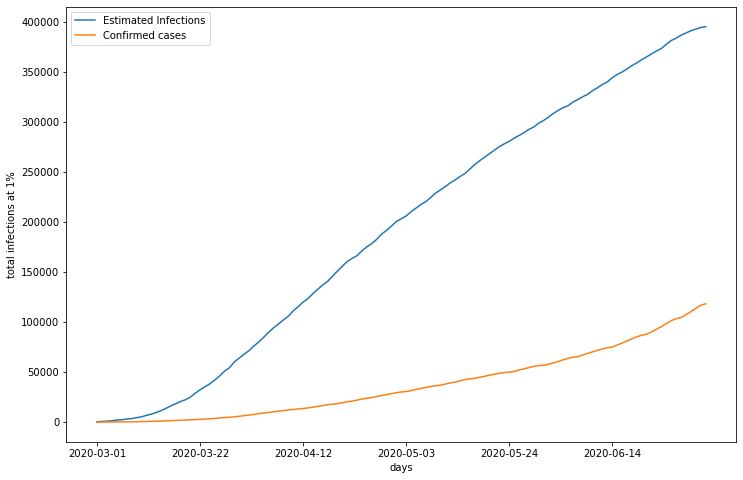

In [2]:
try:
    df = pd.read_csv('https://lacdph.shinyapps.io/covid19_surveillance_dashboard/_w_f37c9304/session/10ab1e924bbee098b7a65bee8613174d/download/download3?w=f37c9304')
    df.to_csv('LA_Backup.csv', index = False)
except:
    df = pd.read_csv('LA_Backup.csv', index_col = False )
    print("Using LA backup file.")

index_val = len(df.index) 

df = df.sort_index(ascending=False, axis=0)
df = df.reset_index()

for ind in df.index:
    if (int(ind)+18) > index_val-1:
        df.loc[ind, 'total_infections'] = 0
    else:
        df.loc[ind, 'total_infections'] = df.loc[ind+18, 'total_deaths'] * 100

df = df[0:-18]

plt.figure(figsize=(12,8))
plt.plot(df['date_use'], df['total_infections'], label='Estimated Infections' )
plt.plot(df['date_use'], df['total_cases'], label='Confirmed cases')
plt.xticks(np.arange(0, 110, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

This graph displays LA's estimated number of infections, calculated with death counts and a death rate 0f 1%, and the number of confirmed cases of COVID 19. The death rate calculated infection estimate appears to be on a decelerating trajectory, and confirmed cases still display expontential growth. Regardless, you can see that the potential number of infections is far greater than the number of cases reported. 

array([[<AxesSubplot:title={'center':'detection_rate'}>]], dtype=object)

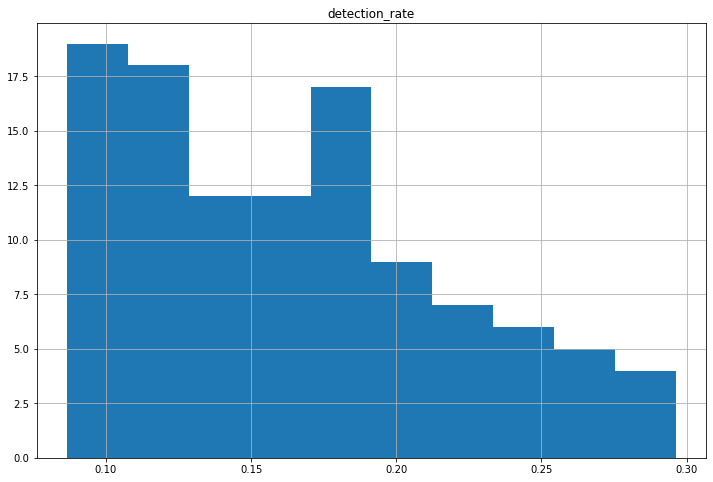

In [3]:
df = df[15:-1]
df['detection_rate'] = df['total_cases'] / df['total_infections']
df.hist(column='detection_rate', bins=10, figsize = (12,8))

To determine the average detection rate in LA county, the number of reported cases is divided by it’s estimated counterpart for each date. This histogram represents the distribution of each day's calculated detection rate. As displayed in the plot, LA appears to detect approximately 10-20% of all COVID 19 cases. 

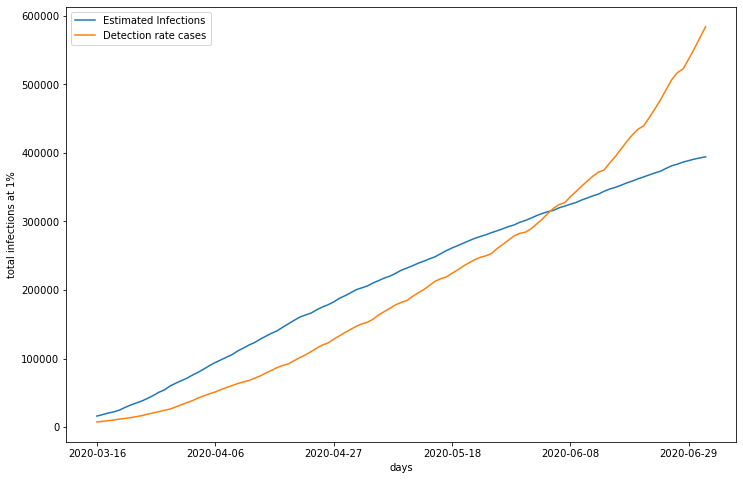

In [4]:
df['detection_cases'] = df['total_cases'] / 0.2

plt.figure(figsize=(12,8))
plt.plot(df['date_use'], df['total_infections'], label='Estimated Infections' )
plt.plot(df['date_use'], df['detection_cases'], label='Detection rate cases')
plt.xticks(np.arange(0, 110, step=21)) 
plt.xlabel('days')
plt.ylabel('total infections at 1%')
plt.legend()

LA’s detection rate ranges from approximately 10-20%. Applying these detection rates to confirmed cases would produce another infection estimate, but this metric would incorporate a variable not directly produced by death counts. By cross validating a detection-rate based infection-estimate with the death-rate based infection-estimate, the validity of both estimation methods can be evaluated. In this graph I chose a conservative 20% detection rate, and divided confirmed cases by that decimal aproximation. To cross validate for accuracy, the detection rate cases are compared to the original infection estimation based on a 1% death rate and reported deaths. As you can see, the two estimates follow two different trajectorys, with death rate calculated infections reporting higher infections until approximately June 2nd, where they cross over. One possible explanation for this is poor testing practices, especially in the early stages of COVID 19. It's relatively safe to assume that counties were under reporting COVID 19 cases due to a shortage of kits and other factors. As more tests become available, many people may take the initiative to get themselves tested, regardless of symptoms present.